In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

seed 3
2023-07-03 08:22:38.144908


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1037.8324)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(5.1439)tensor(3.3450)tensor(5.6757)tensor(5.1502)tensor(4.8636)tensor(6.1983)tensor(4.1808)tensor(5.1707)tensor(6.9066)tensor(3.4146)tensor(9.8055)tensor(3.5475)tensor(4.8158)tensor(3.0632)tensor(5.3049)tensor(3.3219)tensor(6.3853)tensor(5.0962)tensor(5.1380)tensor(4.7505)tensor(6.7190)tensor(3.3505)tensor(4.9395)tensor(5.2708)tensor(7.2131)tensor(10.0056)tensor(5.6067)tensor(3.7446)tensor(3.0803)tensor(3.8097)tensor(6.6191)tensor(4.9928)tensor(6.9454)tensor(5.8052)tensor(4.6852)tensor(4.5657)tensor(4.2448)tensor(7.2433)tensor(7.5664)tensor(5.4395)tensor(5.3937)tensor(3.2263)tensor(5.8274)tensor(3.6590)tensor(5.3762)tensor(3.6686)tensor(2.7609)tensor(4.9974)tensor(7.2896)tensor(2.6472)tensor(3.0593)tensor(3.5293)tensor(7.6907)tensor(4.4060)tensor(4.1948)tensor(6.3299)tensor(3.5259)tensor(5.5777)tensor(5.6715)tensor(3.9586)tensor(3.5976)tensor(2.9223)tensor(5.0440)tensor(5.2337)tensor(2.7229)tensor(2.6100)tensor(6.8254)tensor(2.8313)tensor(7.0935)tensor(6.6624)tensor(5.2173)tenso

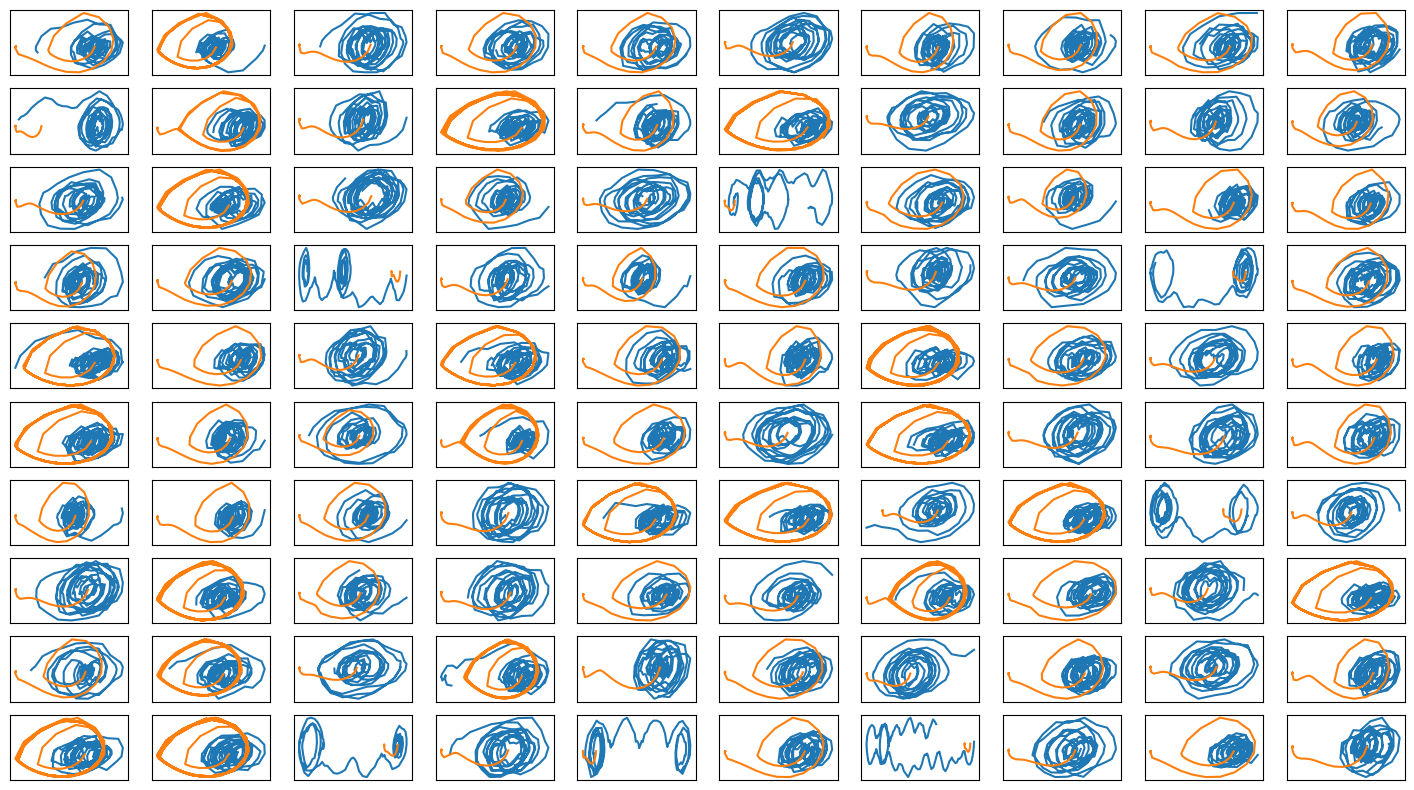

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 907.78444  validloss 693.81308±0.00000  bestvalidloss 693.81308  last_update 0
train: iter 1  trainloss 562.04460  validloss 503.24787±0.00000  bestvalidloss 503.24787  last_update 0
train: iter 2  trainloss 412.61631  validloss 403.58382±0.00000  bestvalidloss 403.58382  last_update 0
train: iter 3  trainloss 335.19119  validloss 329.29460±0.00000  bestvalidloss 329.29460  last_update 0
train: iter 4  trainloss 195.31246  validloss 228.24325±0.00000  bestvalidloss 228.24325  last_update 0
train: iter 5  trainloss 84.37816  validloss 67.00361±0.00000  bestvalidloss 67.00361  last_update 0
train: iter 6  trainloss 24.80691  validloss -12.48074±0.00000  bestvalidloss -12.48074  last_update 0
train: iter 7  trainloss 48.06479  validloss -73.31014±0.00000  bestvalidloss -73.31014  last_update 0
train: iter 8  trainloss -24.81063  validloss -5.58244±0.00000  bestvalidloss -73.31014  last_update 1
train: iter 9  trainloss -57.72807  validloss -132.

train: iter 77  trainloss -532.20444  validloss -622.89443±0.00000  bestvalidloss -631.34070  last_update 1
train: iter 78  trainloss -538.14087  validloss -571.54026±0.00000  bestvalidloss -631.34070  last_update 2
train: iter 79  trainloss -542.46630  validloss -650.46619±0.00000  bestvalidloss -650.46619  last_update 0
train: iter 80  trainloss -533.21105  validloss -583.30453±0.00000  bestvalidloss -650.46619  last_update 1
train: iter 81  trainloss -550.33923  validloss -549.69581±0.00000  bestvalidloss -650.46619  last_update 2
train: iter 82  trainloss -523.97672  validloss -669.08710±0.00000  bestvalidloss -669.08710  last_update 0
train: iter 83  trainloss -514.79807  validloss -655.88978±0.00000  bestvalidloss -669.08710  last_update 1
train: iter 84  trainloss -544.10389  validloss -666.47324±0.00000  bestvalidloss -669.08710  last_update 2
train: iter 85  trainloss -557.70743  validloss -654.27534±0.00000  bestvalidloss -669.08710  last_update 3
train: iter 86  trainloss -5

train: iter 153  trainloss -665.95466  validloss -736.58005±0.00000  bestvalidloss -784.61571  last_update 2
train: iter 154  trainloss -669.15840  validloss -776.75331±0.00000  bestvalidloss -784.61571  last_update 3
train: iter 155  trainloss -645.68829  validloss -760.68384±0.00000  bestvalidloss -784.61571  last_update 4
train: iter 156  trainloss -676.25225  validloss -779.11789±0.00000  bestvalidloss -784.61571  last_update 5
train: iter 157  trainloss -655.36889  validloss -725.83418±0.00000  bestvalidloss -784.61571  last_update 6
train: iter 158  trainloss -647.68049  validloss -753.21523±0.00000  bestvalidloss -784.61571  last_update 7
train: iter 159  trainloss -687.89481  validloss -760.89550±0.00000  bestvalidloss -784.61571  last_update 8
train: iter 160  trainloss -648.52248  validloss -751.92830±0.00000  bestvalidloss -784.61571  last_update 9
train: iter 161  trainloss -684.99378  validloss -771.50090±0.00000  bestvalidloss -784.61571  last_update 10
train: iter 162  t

train: iter 228  trainloss -706.31052  validloss -704.94283±0.00000  bestvalidloss -810.61877  last_update 4
train: iter 229  trainloss -708.54584  validloss -811.64809±0.00000  bestvalidloss -811.64809  last_update 0
train: iter 230  trainloss -710.62221  validloss -804.24388±0.00000  bestvalidloss -811.64809  last_update 1
train: iter 231  trainloss -674.57652  validloss -758.63663±0.00000  bestvalidloss -811.64809  last_update 2
train: iter 232  trainloss -615.69609  validloss -785.89417±0.00000  bestvalidloss -811.64809  last_update 3
train: iter 233  trainloss -690.90872  validloss -722.94725±0.00000  bestvalidloss -811.64809  last_update 4
train: iter 234  trainloss -697.38618  validloss -773.96096±0.00000  bestvalidloss -811.64809  last_update 5
train: iter 235  trainloss -695.40264  validloss -638.55805±0.00000  bestvalidloss -811.64809  last_update 6
train: iter 236  trainloss -694.29049  validloss -806.45042±0.00000  bestvalidloss -811.64809  last_update 7
train: iter 237  tr

train: iter 303  trainloss -718.79080  validloss -793.36581±0.00000  bestvalidloss -818.05857  last_update 43
train: iter 304  trainloss -719.11042  validloss -728.51348±0.00000  bestvalidloss -818.05857  last_update 44
train: iter 305  trainloss -727.12907  validloss -671.07769±0.00000  bestvalidloss -818.05857  last_update 45
train: iter 306  trainloss -727.72621  validloss -680.30937±0.00000  bestvalidloss -818.05857  last_update 46
train: iter 307  trainloss -723.68503  validloss -678.83137±0.00000  bestvalidloss -818.05857  last_update 47
train: iter 308  trainloss -726.32941  validloss -715.31402±0.00000  bestvalidloss -818.05857  last_update 48
train: iter 309  trainloss -704.99761  validloss -670.36431±0.00000  bestvalidloss -818.05857  last_update 49
train: iter 310  trainloss -685.92071  validloss -723.87727±0.00000  bestvalidloss -818.05857  last_update 50
train: iter 311  trainloss -724.20386  validloss -796.42785±0.00000  bestvalidloss -818.05857  last_update 51
train: ite

train: iter 378  trainloss -750.81432  validloss -825.34775±0.00000  bestvalidloss -827.65205  last_update 33
train: iter 379  trainloss -752.27420  validloss -824.48842±0.00000  bestvalidloss -827.65205  last_update 34
train: iter 380  trainloss -760.49864  validloss -824.09809±0.00000  bestvalidloss -827.65205  last_update 35
train: iter 381  trainloss -711.51894  validloss -819.65531±0.00000  bestvalidloss -827.65205  last_update 36
train: iter 382  trainloss -727.45334  validloss -817.82761±0.00000  bestvalidloss -827.65205  last_update 37
train: iter 383  trainloss -754.24201  validloss -767.23549±0.00000  bestvalidloss -827.65205  last_update 38
train: iter 384  trainloss -746.83029  validloss -820.32717±0.00000  bestvalidloss -827.65205  last_update 39
train: iter 385  trainloss -752.84940  validloss -825.92218±0.00000  bestvalidloss -827.65205  last_update 40
train: iter 386  trainloss -722.52768  validloss -805.67627±0.00000  bestvalidloss -827.65205  last_update 41
train: ite

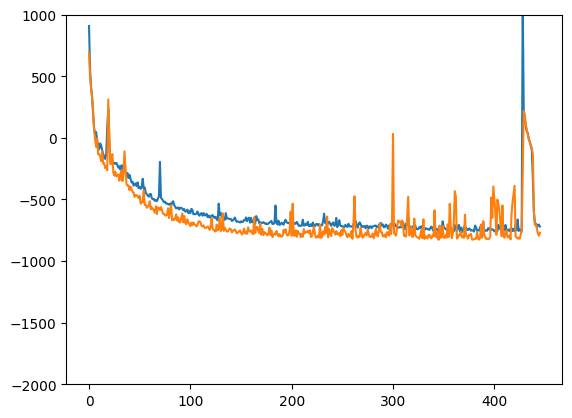

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


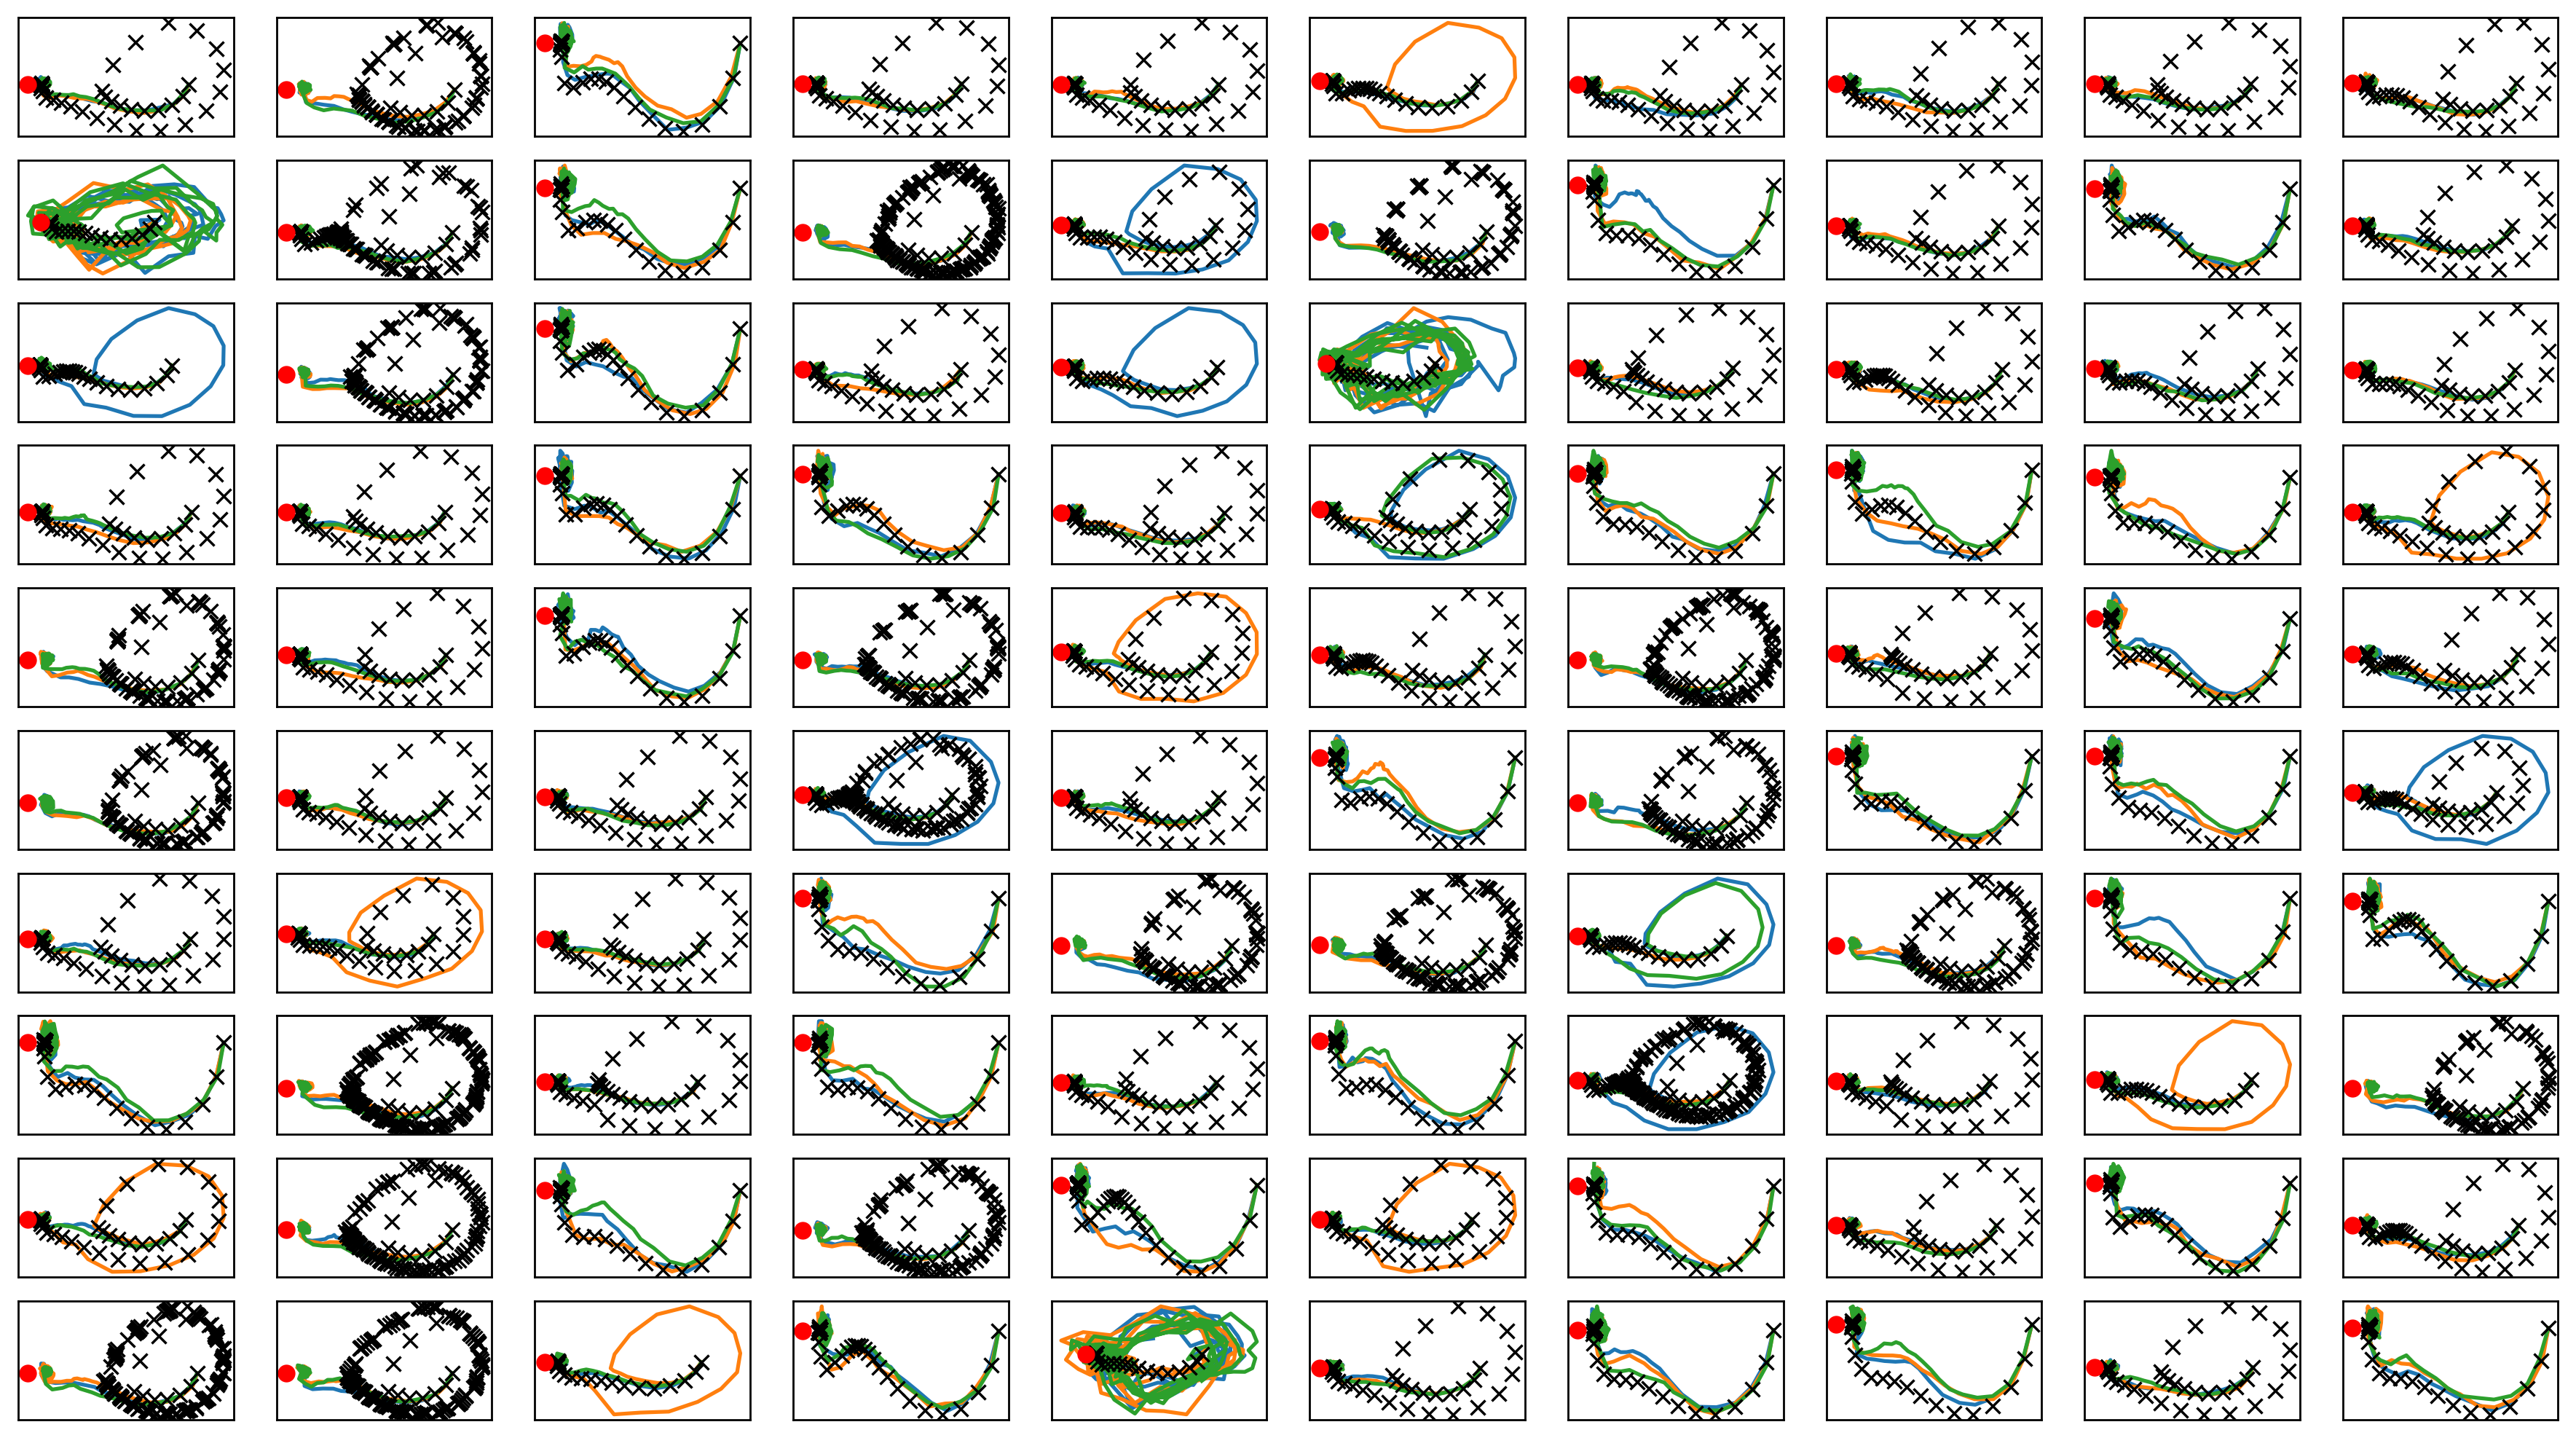

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

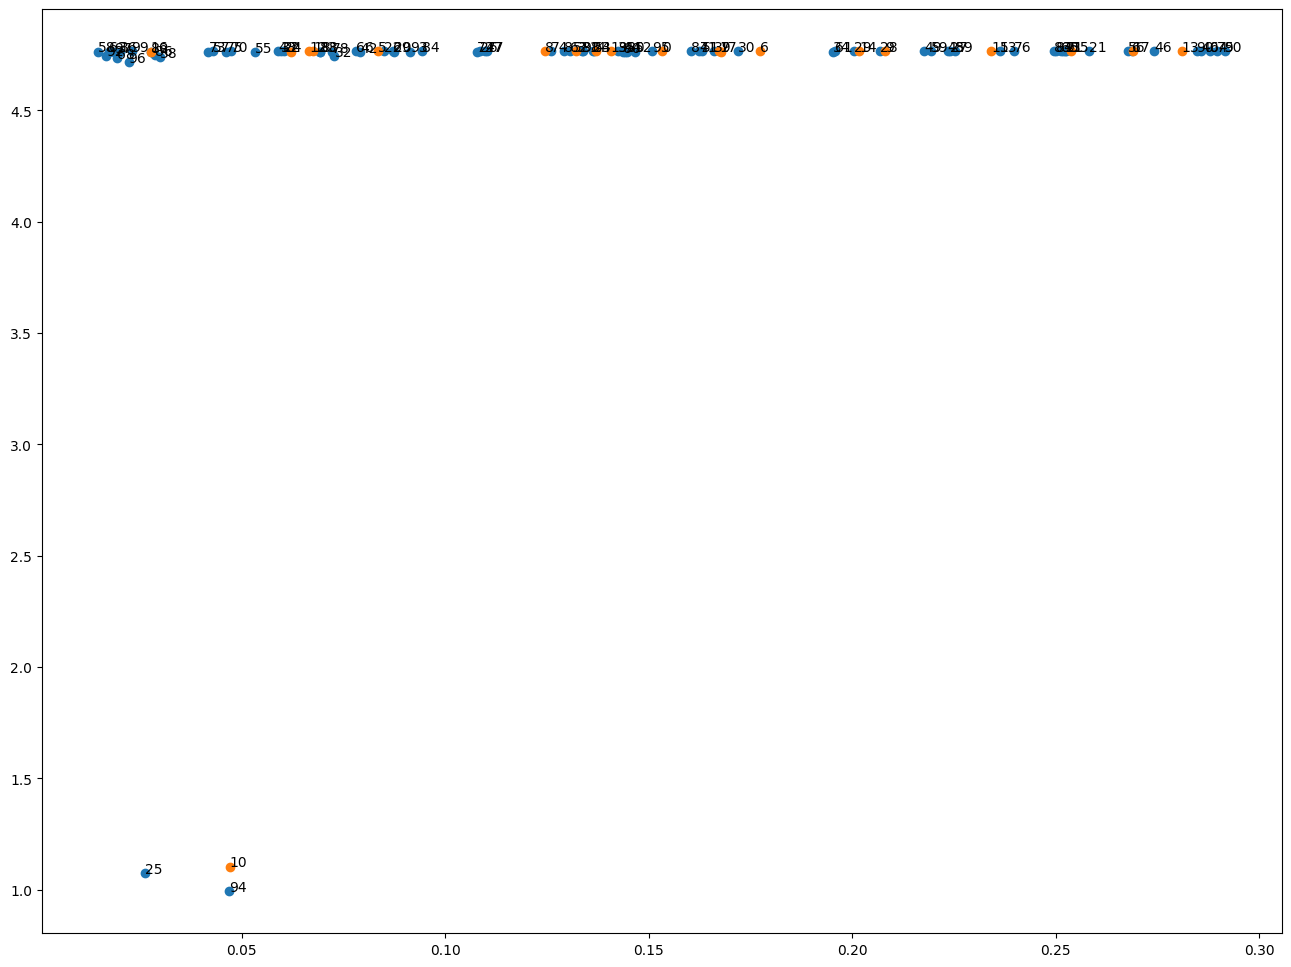

[0.15324828 0.26888793 0.06217286 0.13224295 0.13704997 0.08354618
 0.17725885 0.16765623 0.12453036 0.20794138 0.04706032 0.23409443
 0.06658737 0.28091509 0.2017151  0.25372526 0.0276651  0.16735223
 0.06751635 0.14068207 0.08753783 0.25816017 0.08504636 0.13638662
 0.06041361 0.02616881 0.10865286 0.22402387 0.20675412 0.20044044
 0.17183816 0.13354351 0.07280263 0.06917526 0.19514306 0.14252658
 0.02009083 0.05969281 0.0300313  0.16598332 0.28563037 0.1623059
 0.079166   0.25175792 0.14407199 0.2234257  0.27419258 0.10978218
 0.05891417 0.21770089 0.29162951 0.1630783  0.14666197 0.23628546
 0.13658381 0.05316401 0.26771796 0.0429997  0.01473268 0.21921244
 0.14369349 0.19566694 0.13065617 0.01731945 0.28791216 0.25123873
 0.07810352 0.2686711  0.01940196 0.08726173 0.0474101  0.25242589
 0.10773226 0.04184014 0.12587483 0.04612206 0.2396893  0.11031089
 0.0721711  0.28956844 0.14474911 0.25010637 0.02763948 0.24952833
 0.0943959  0.12924451 0.02867004 0.16042046 0.06925088 0.22530

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


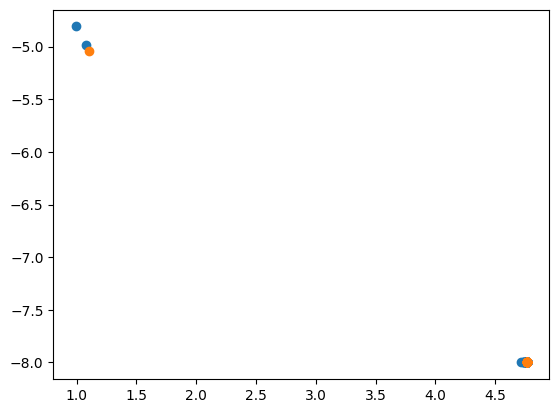

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 11.41643  validloss 11.75173±0.00000  bestvalidloss 11.75173  last_update 0
train: iter 1  trainloss 10.37604  validloss 10.63125±0.00000  bestvalidloss 10.63125  last_update 0
train: iter 2  trainloss 9.50944  validloss 9.68190±0.00000  bestvalidloss 9.68190  last_update 0
train: iter 3  trainloss 8.74003  validloss 8.87343±0.00000  bestvalidloss 8.87343  last_update 0
train: iter 4  trainloss 8.06750  validloss 8.19186±0.00000  bestvalidloss 8.19186  last_update 0
train: iter 5  trainloss 7.49191  validloss 7.63407±0.00000  bestvalidloss 7.63407  last_update 0
train: iter 6  trainloss 6.98564  validloss 7.06721±0.00000  bestvalidloss 7.06721  last_update 0
train: iter 7  trainloss 6.53648  validloss 6.61736±0.00000  bestvalidloss 6.61736  last_update 0
train: iter 8  trainloss 6.14105  validloss 6.21592±0.00000  bestvalidloss 6.21592  last_update 0
train: iter 9  trainloss 5.79314  validloss 5.84611±0.00000  bestvalidloss 5.84611  last_update 0
train: iter 10

train: iter 84  trainloss 1.40565  validloss 1.47757±0.00000  bestvalidloss 1.47757  last_update 0
train: iter 85  trainloss 1.37114  validloss 1.44842±0.00000  bestvalidloss 1.44842  last_update 0
train: iter 86  trainloss 1.34195  validloss 1.40177±0.00000  bestvalidloss 1.40177  last_update 0
train: iter 87  trainloss 1.30114  validloss 1.40403±0.00000  bestvalidloss 1.40177  last_update 1
train: iter 88  trainloss 1.27878  validloss 1.36491±0.00000  bestvalidloss 1.36491  last_update 0
train: iter 89  trainloss 1.24221  validloss 1.34919±0.00000  bestvalidloss 1.34919  last_update 0
train: iter 90  trainloss 1.22453  validloss 1.31400±0.00000  bestvalidloss 1.31400  last_update 0
train: iter 91  trainloss 1.19879  validloss 1.30062±0.00000  bestvalidloss 1.30062  last_update 0
train: iter 92  trainloss 1.17825  validloss 1.30180±0.00000  bestvalidloss 1.30062  last_update 1
train: iter 93  trainloss 1.15380  validloss 1.28932±0.00000  bestvalidloss 1.28932  last_update 0
train: ite

train: iter 168  trainloss 0.90831  validloss 1.24432±0.00000  bestvalidloss 1.13843  last_update 41
train: iter 169  trainloss 0.88471  validloss 1.24089±0.00000  bestvalidloss 1.13843  last_update 42
train: iter 170  trainloss 0.89448  validloss 1.25967±0.00000  bestvalidloss 1.13843  last_update 43
train: iter 171  trainloss 0.86582  validloss 1.23003±0.00000  bestvalidloss 1.13843  last_update 44
train: iter 172  trainloss 0.87006  validloss 1.21235±0.00000  bestvalidloss 1.13843  last_update 45
train: iter 173  trainloss 0.87645  validloss 1.28425±0.00000  bestvalidloss 1.13843  last_update 46
train: iter 174  trainloss 0.90442  validloss 1.30898±0.00000  bestvalidloss 1.13843  last_update 47
train: iter 175  trainloss 0.88183  validloss 1.32077±0.00000  bestvalidloss 1.13843  last_update 48
train: iter 176  trainloss 0.89414  validloss 1.23995±0.00000  bestvalidloss 1.13843  last_update 49
train: iter 177  trainloss 0.89835  validloss 1.21380±0.00000  bestvalidloss 1.13843  last_

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 4.6690, -0.5677], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 12.78140  validloss 18.17724±0.00000  bestvalidloss 18.17724  last_update 0
train: iter 1  trainloss 6.36118  validloss 9.49697±0.00000  bestvalidloss 9.49697  last_update 0
train: iter 2  trainloss 3.63391  validloss 4.66589±0.00000  bestvalidloss 4.66589  last_update 0
train: iter 3  trainloss 2.70138  validloss 2.85956±0.00000  bestvalidloss 2.85956  last_update 0
train: iter 4  trainloss 2.31613  validloss 2.10225±0.00000  bestvalidloss 2.10225  last_update 0
train: iter 5  trainloss 2.11145  validloss 1.79173±0.00000  bestvalidloss 1.79173  last_update 0
train: iter 6  trainloss 1.97595  validloss 1.66463±0.00000  bestvalidloss 1.66463  last_update 0
train: iter 7  trainloss 1.88698  validloss 1.48137±0.00000  bestvalidloss 1.48137  last_update 0
train: iter 8  trainloss 1.79501  validloss 1.40151±0.00000  bestvalidloss 1.40151  last_update 0
train: iter 9  trainloss 1.74067  validloss 1.30838±0.00000  bestvalidloss 1.30838  last_update 0
train: iter 10  t

train: iter 83  trainloss 1.43550  validloss 0.79074±0.00000  bestvalidloss 0.77570  last_update 41
train: iter 84  trainloss 1.46776  validloss 0.84878±0.00000  bestvalidloss 0.77570  last_update 42
train: iter 85  trainloss 1.45365  validloss 0.80282±0.00000  bestvalidloss 0.77570  last_update 43
train: iter 86  trainloss 1.42937  validloss 0.77260±0.00000  bestvalidloss 0.77260  last_update 0
train: iter 87  trainloss 1.43890  validloss 0.82035±0.00000  bestvalidloss 0.77260  last_update 1
train: iter 88  trainloss 1.42929  validloss 0.84947±0.00000  bestvalidloss 0.77260  last_update 2
train: iter 89  trainloss 1.44300  validloss 0.85112±0.00000  bestvalidloss 0.77260  last_update 3
train: iter 90  trainloss 1.41877  validloss 0.77025±0.00000  bestvalidloss 0.77025  last_update 0
train: iter 91  trainloss 1.46144  validloss 0.84198±0.00000  bestvalidloss 0.77025  last_update 1
train: iter 92  trainloss 1.42847  validloss 0.81547±0.00000  bestvalidloss 0.77025  last_update 2
train: 

train: iter 166  trainloss 1.41623  validloss 0.84723±0.00000  bestvalidloss 0.76011  last_update 31
train: iter 167  trainloss 1.43891  validloss 0.79065±0.00000  bestvalidloss 0.76011  last_update 32
train: iter 168  trainloss 1.42431  validloss 0.77986±0.00000  bestvalidloss 0.76011  last_update 33
train: iter 169  trainloss 1.40134  validloss 0.81831±0.00000  bestvalidloss 0.76011  last_update 34
train: iter 170  trainloss 1.43702  validloss 0.77788±0.00000  bestvalidloss 0.76011  last_update 35
train: iter 171  trainloss 1.40731  validloss 0.83839±0.00000  bestvalidloss 0.76011  last_update 36
train: iter 172  trainloss 1.43378  validloss 0.86044±0.00000  bestvalidloss 0.76011  last_update 37
train: iter 173  trainloss 1.44192  validloss 0.84251±0.00000  bestvalidloss 0.76011  last_update 38
train: iter 174  trainloss 1.43172  validloss 0.79508±0.00000  bestvalidloss 0.76011  last_update 39
train: iter 175  trainloss 1.44236  validloss 0.79028±0.00000  bestvalidloss 0.76011  last_

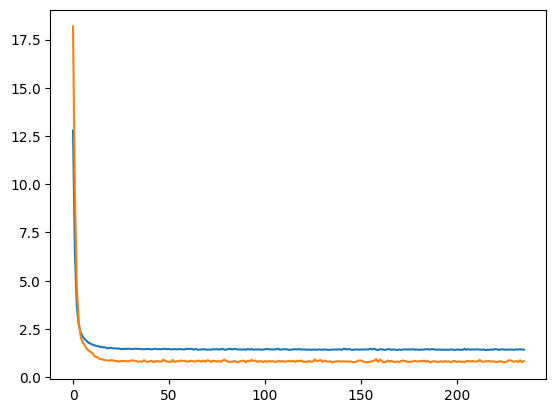

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(4.1013)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(3.4960)


In [21]:
print(vi.h_min_tilde)

-5.5209284


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-1.1687677732911261
tensor([0.6080])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

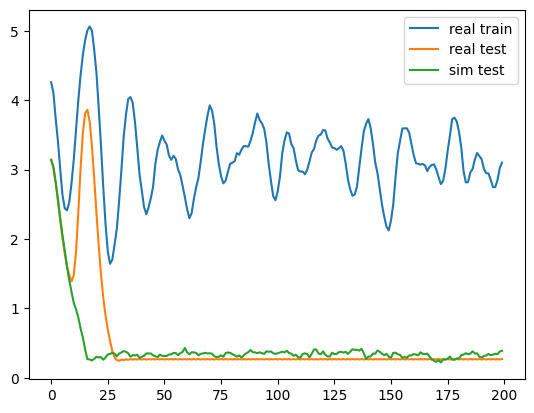

encoder [ 4.7646933 -8.       ]
initial_belief tensor([ 4.6690, -0.5677])
real train tensor([ 4.7590, -8.0081])
real test tensor([ 4.6542, -0.5786])
sim tensor([ 4.7980, -7.9837])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


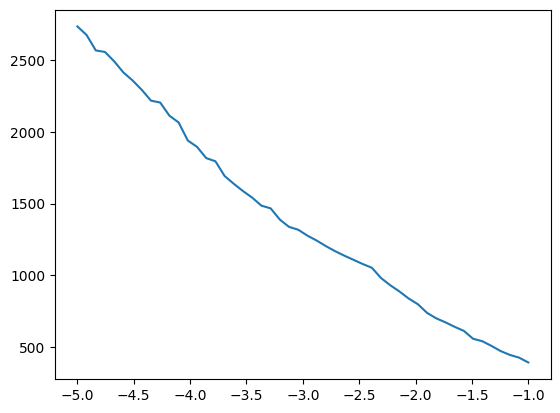

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

1.2507531331076331
tensor([-0.0674])
